In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("S&OP_Assessment_Test.xlsx", sheet_name='Table A')
df=df.iloc[:,:10]

In [40]:
df.columns

Index(['acct_yr_i', 'acct_wk_i', 'dc_id', 'Store_id', 'location_type',
       'dept_id', 'actual_qty', 'fcst_qty', 'Error', 'Division_name', 'diff'],
      dtype='object')

In [22]:
df1 = pd.read_excel("S&OP_Assessment_Test.xlsx", sheet_name='Table C')

In [10]:
df.head(10)

,acct_yr_i,acct_wk_i,dc_id,Store_id,location_type,dept_id,actual_qty,fcst_qty,Error,Division_name
0,2023,1,551,4,General Merch,9,2177,1024.4,-0.114994,SEASNL/OUTDR LIVING
1,2023,2,551,4,General Merch,53,2100,3438.0,-0.389180,STATIONERY
2,2023,3,551,52,General Merch,53,1306,975.0,0.339487,STATIONERY
3,2023,3,551,52,General Merch,64,901,923.8,-0.160987,DOMESTICS
4,2023,3,551,71,General Merch,83,556,253.8,-0.112372,PETS
5,2023,4,551,85,General Merch,66,1420,1034.6,-0.145100,DOMESTICS
6,2023,2,551,215,General Merch,18,2416,1691.0,0.428740,READY-TO-WEAR
7,2023,5,551,215,General Merch,71,1640,2425.0,-0.323711,SNACKS/CANDY
8,2023,5,551,220,General Merch,70,1671,3148.0,-0.470140,KITCHEN
9,2023,5,551,619,SuperTarget,70,1894,2784.0,-0.319714,KITCHEN


In [32]:
df['Division_name'].value_counts()  # whole data can also be looked with the Division_name prospective

Division_name
DOMESTICS              249
STORAGE/UTILITY        190
KITCHEN                189
STATIONERY             140
SEASNL/OUTDR LIVING    135
SNACKS/CANDY           133
DECORATIVE HOME        126
PETS                    95
DRY GROCERY             66
INT/HOS/SLEEP           62
READY-TO-WEAR           60
OTC                     55
Name: count, dtype: int64

In [12]:
df.describe()
"""
!500 data points for different distribution center across 5 weeks.
We have a forecast model running but
    - it predicts heigher mean sales than actual.
    - deviation for forecast is also more than actual sales indicating scope for improvement in forecasting model
"""

,acct_yr_i,acct_wk_i,dc_id,Store_id,dept_id,actual_qty,fcst_qty,Error
count,1500.0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2023.0,3.021333,966.548000,1615.238667,112.363333,1049.458667,1174.905333,-0.094087
std,0.0,1.392182,1080.212508,983.010264,95.908079,872.605739,962.293584,0.333501
min,2023.0,1.000000,551.000000,3.000000,2.000000,1.000000,52.400000,-0.499305
25%,2023.0,2.000000,553.000000,808.000000,55.000000,283.000000,581.150000,-0.191056
50%,2023.0,3.000000,556.000000,1471.000000,72.000000,909.000000,922.900000,-0.168715
75%,2023.0,4.000000,558.000000,2279.000000,200.000000,1716.250000,1223.250000,-0.121639
max,2023.0,5.000000,3802.000000,3445.000000,329.000000,4625.000000,5914.000000,1.924666


### grouping data on the basis of division name 

In [83]:
imp_df=df[['Division_name','actual_qty','fcst_qty','Error','diff','acct_wk_i']]
grp_div_name = imp_df.groupby(['acct_wk_i', 'Division_name']).sum().reset_index()

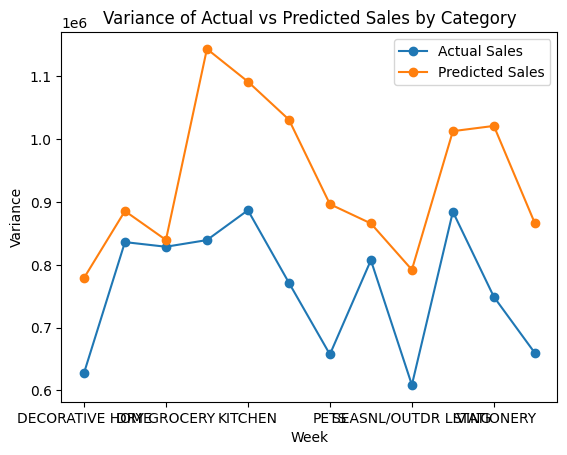

In [75]:


variance_data = imp_df.groupby(['Division_name']).var()[['actual_qty', 'fcst_qty']]

# Create a line chart to visualize the variance of actual vs predicted sales for each category
variance_data.plot(kind='line', marker='o')
plt.xlabel('Week')
plt.ylabel('Variance')
plt.title('Variance of Actual vs Predicted Sales by Category')
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

In [76]:
variance_data


,actual_qty,fcst_qty
Division_name,,
DECORATIVE HOME,627385.671937,7.788793e+05
DOMESTICS,836145.435419,8.856447e+05
DRY GROCERY,828767.634732,8.395930e+05
INT/HOS/SLEEP,839375.882866,1.143816e+06
KITCHEN,886931.934200,1.091721e+06
OTC,771449.682155,1.031240e+06
PETS,657335.413662,8.965944e+05
READY-TO-WEAR,807340.080226,8.659008e+05
SEASNL/OUTDR LIVING,608712.073742,7.921522e+05


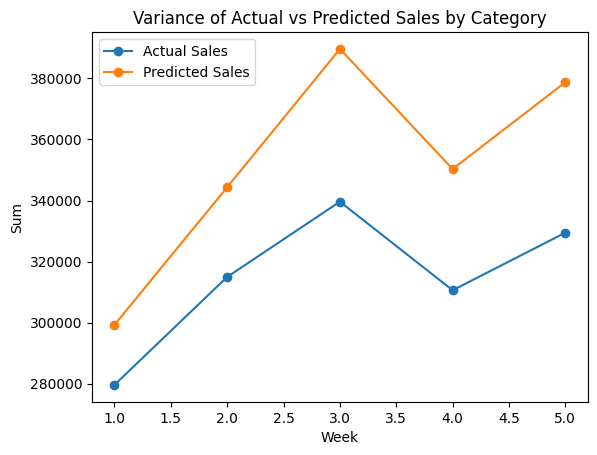

In [80]:
variance_data = imp_df.groupby(['acct_wk_i']).sum()[['actual_qty', 'fcst_qty']]

# Create a line chart to visualize the variance of actual vs predicted sales for each category
variance_data.plot(kind='line', marker='o')
plt.xlabel('Week')
plt.ylabel('Sum')
plt.title('Variance of Actual vs Predicted Sales by Category')
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

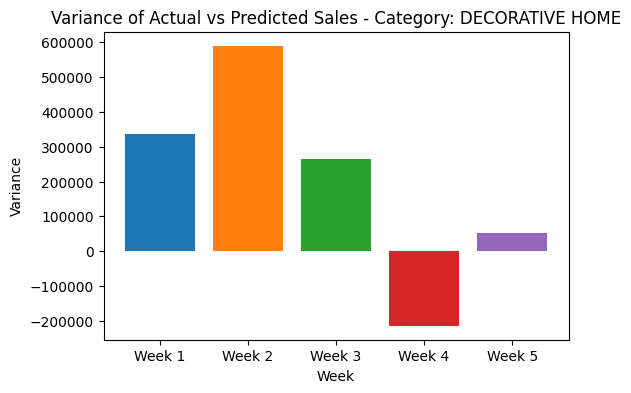

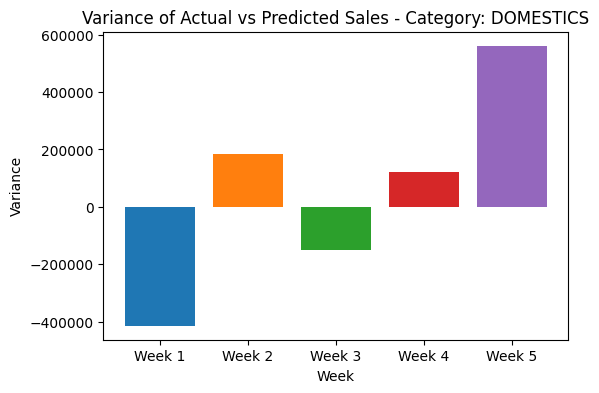

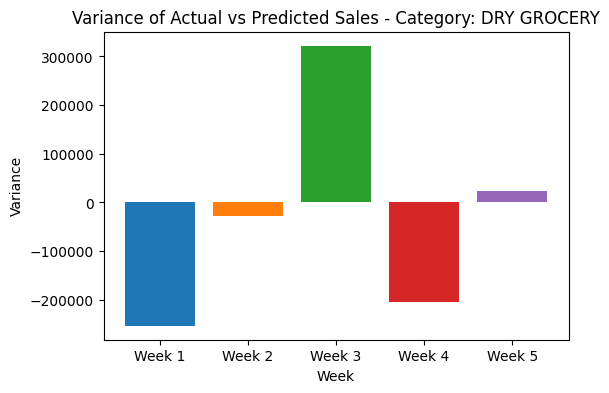

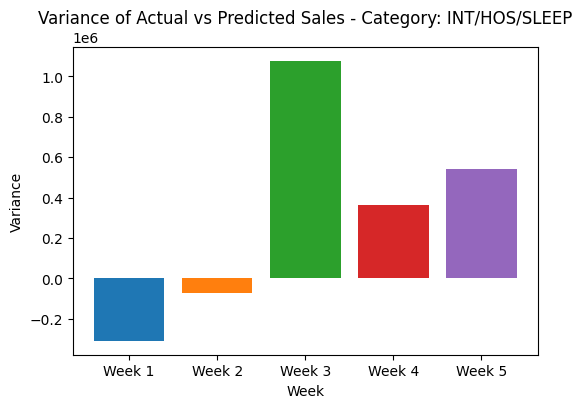

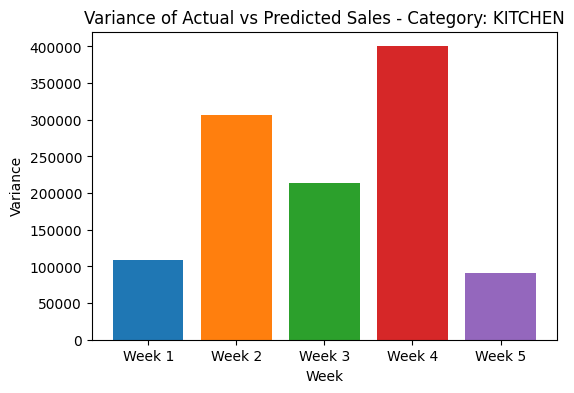

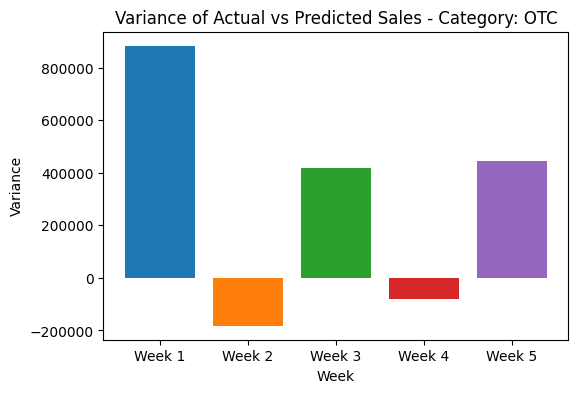

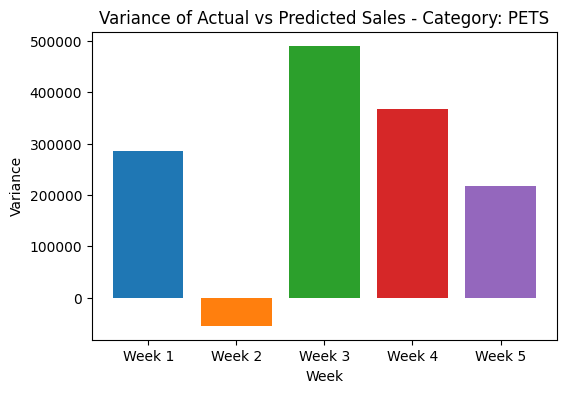

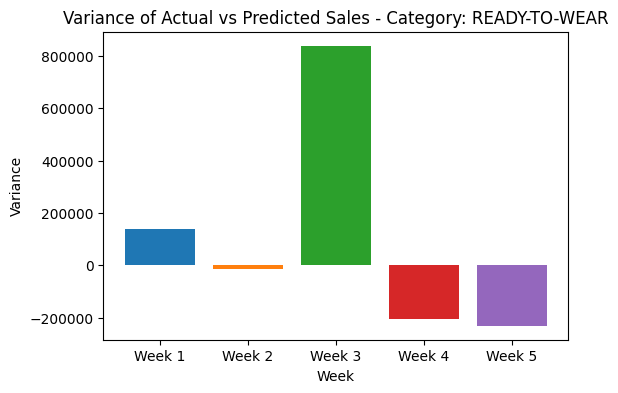

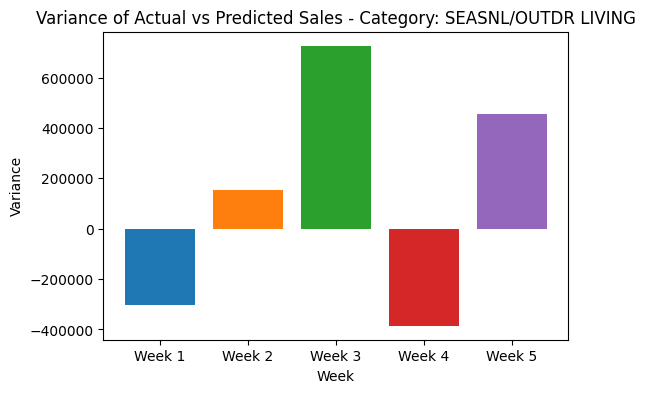

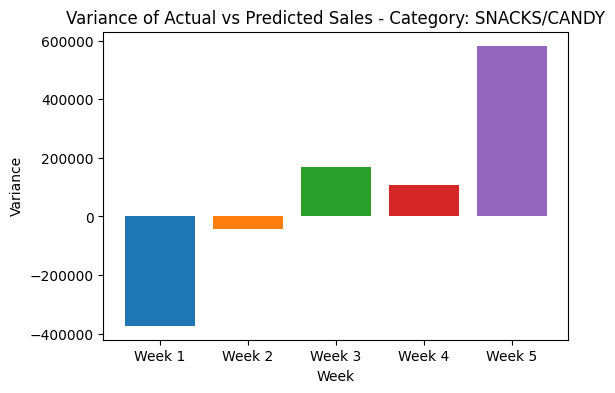

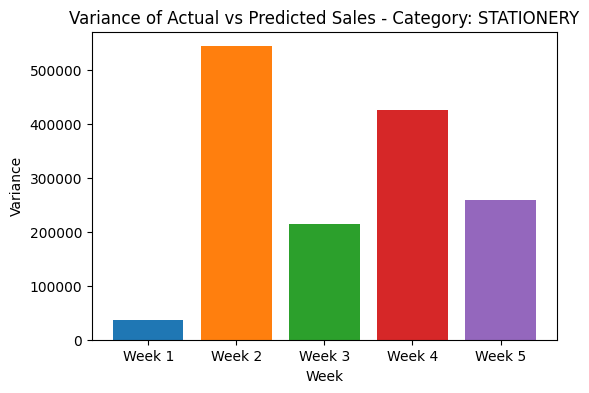

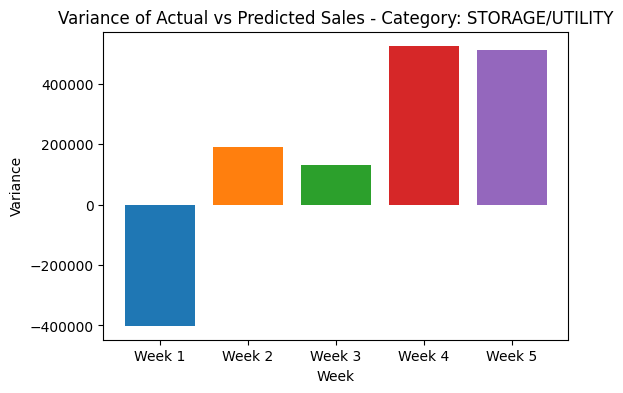

In [82]:
grouped_data = imp_df.groupby('Division_name')

# Iterate over each group and create a separate graph for each category
for category, group in grouped_data:
    # Create a figure and subplots for each category

    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Iterate over each week and plot the variance of actual vs predicted sales
    for week in range(1, 6):
        # Filter the data for the current category and week
        filtered_data = group[group['acct_wk_i'] == week]
        
        # Calculate the variance of actual vs predicted sales for the current category and week
        variance = filtered_data['fcst_qty'].var()- filtered_data['actual_qty'].var()
        
        # Plot the variance on the corresponding subplot
        ax.bar(['Week ' + str(week)], [variance])
    
    # Set labels and title for the current subplot
    ax.set_xlabel('Week')
    ax.set_ylabel('Variance')
    ax.set_title('Variance of Actual vs Predicted Sales - Category: ' + category)
    
    # Show the plot for the current category
    plt.show()

### Grouping data on the basis of dc_id

<Axes: >

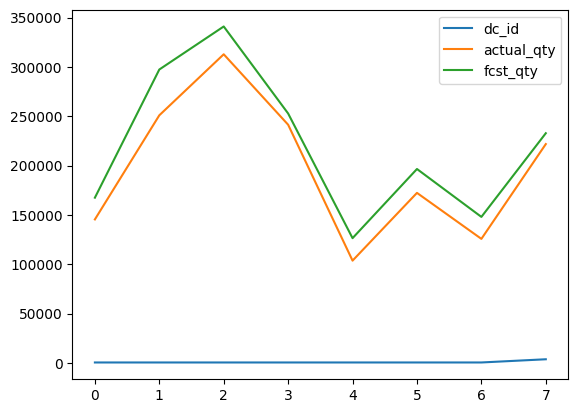

In [67]:
imp_df=df[['dc_id','actual_qty','fcst_qty','acct_wk_i']]
gk=imp_df.groupby(['dc_id'])[['actual_qty','fcst_qty']].sum().reset_index()
gk.plot()

<Axes: >

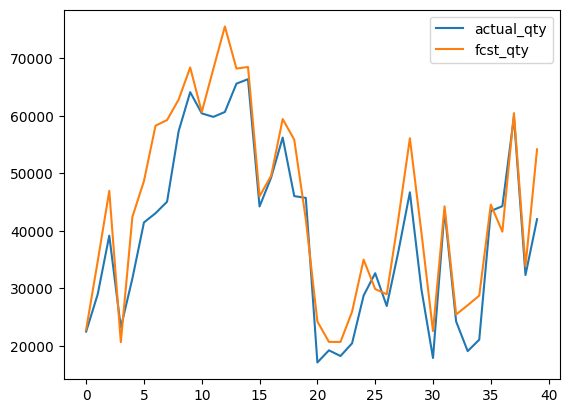

In [36]:
imp_df=df[['dc_id','actual_qty','fcst_qty','acct_wk_i']]
gk=imp_df.groupby(['dc_id','acct_wk_i'])[['actual_qty','fcst_qty']].sum().reset_index()
gk[['actual_qty','fcst_qty']].plot()

> 8. Summary

- Forecast is more than the actual sales in most cases thus indicating overfitting of the model.
- looking at the sales data on the basis of dc_id we see that the forecast sales is more than actual sales in a consistent manner, so tuning the prediction model can give us better and accurate result.
- looking at the sales data on the basis of category we see that forecast value for all but "DRY GROCERY" was high consistantly .


> 9. Describe a Statistical methodology that can be used to improve the forecast accuracy in future weeks

In my openion, Following methods can be used to improve the forecast accuracy in future weeks
- Since Forecast is more than actual sales in most cases, thus indicating overfitting. To adress this we can:
- Evaluate the model's performance on a separate validation or test dataset to check if the overfitting persists.
- Simplify the model by reducing its complexity, such as by limiting the number of features or using regularization techniques.
- Increase the size of the training dataset to provide the model with more diverse examples to learn from.
- Use cross-validation techniques to assess the model's performance on multiple subsets of the data.